In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc

# GILA
## Objective:  To gather textual information from the dataset given by the GMTR team to be able to identify new rules in subsequent IMA's/IMA updates that come in through the GMTR team per year. First, we will identify all columns in which we could attempt to solve this proposal.

In [2]:
con = pyodbc.connect(r"Driver={/usr/local/lib/libmsodbcsql.17.dylib};Server=EPGLBSQLDSDV01,50429;Database=GILA;Trusted_Connection=yes;timeout=login_timeout")
rules = pd.read_sql(f'SELECT * FROM dbo.TrainingDB_v2 with(nolock) WHERE Comments IS NOT NULL', con)
rules


,Live_Rule_Id,Bloomberg_AIM_CMGR_ID,Standard_Library_IDs,Fund_Name,Description,Rule_Set,Limit_Type,Rule_Type,Override_Permitted_,Total_Limit,Sector_Limit,Holding_Limit,Rule_Category,Rule_Class,User_Specified_Category,Source,Comments,Enabled_,Regulation_Type,column_20
0,297893,80%_GHYF,Bespoke,40GHYF,Min 80% of NAV in HY securities inc. in North ...,TS1_PRE/POST,Net Primary Exposure as a %,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,[blank],Port Concentr - %MV,"Barings Funds Trust Prospectus dd 01/11/2016, ...",PRINCIPAL INVESTMENT STRATEGIESUnder normal co...,True,[Blank],None
1,297998,MIN40_GH,Bespoke,40GHYF,Min 40% of NAV in securities of foreign compan...,TS1_PRE/POST,Percentage Value of NAV,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,[blank],Asset Allocation - FI,"Barings Funds Trust Prospectus dd 01/11/2016, ...",The Fund may also invest to a lesser extent in...,True,<Unassigned>,None
2,307551,<Unassigned>,290881,40TREMF,Permitted Investments,TS1_PRE/POST,Permitted Holdings,Restrict by Absolute Prohibition,Override by User,0.00%,0.00%,0.00%,Client Mandate,[blank],Permitted Investments,Barings Fund Trust dd 01/11/2018\n,"The Fund will invest in debt securities, deriv...",True,<Unassigned>,None
3,295274,80%_EMRC,290891,40TREMF,Min 80% of NAV in Emerging Markets,TS1_PRE/POST,Net Primary Exposure as a %,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,[blank],Port Concentr - %MV,"BFT Investment Restrictions & Policies Table, ...",MANDATE:\nThe Fund will invest in debt securit...,True,<Unassigned>,None
4,307537,<Unassigned>,290985,40TREMF,Max 15% of NAV In Illiquid Securities,TS1_PRE/POST,Percentage Value of NAV,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,[blank],General Restriction,Barings Fund Trust dd 01/11/2018\n,The Fund may invest up to 15% of its ne...,True,<Unassigned>,None
5,307544,<Unassigned>,289447,40USHYF,Investment Objective,OCU_TXTRULE,<None>,Manual Check - Always Fail,Override by User,0.00%,0.00%,0.00%,Client Mandate,Information,Objectives,Barings Fund Trust Prospectus dd 01/11/2018\n,Barings U.S. High Yield Fund (“U.S. High Yie...,True,<Unassigned>,None
6,307549,<Unassigned>,290881,40USHYF,Permitted Investments,TS1_PRE/POST,Permitted Holdings,Restrict by Absolute Prohibition,Override by User,0.00%,0.00%,0.00%,Client Mandate,[blank],Permitted Investments,Barings Fund Trust dd 01/11/2018\n,The Fund invests primarily in lower rated U.S...,True,<Unassigned>,None
7,296553,410WAM,290887,40USHYF,Max 4-10 years Weighted Average Maturity (WAM),TS1_PRE/POST,Maturity (A),Restrict Portfolio Metric,Override by User,10.00 yrs,0.00 yrs,0.00 yrs,Client Mandate,[blank],Maturity,"Barings Funds Trust Prospectus dd 01/11/2016, ...",The Fund may enter into repurchase agreement t...,True,<Unassigned>,None
8,297004,80%_US,290895,40USHYF,Min 80% of NAV in US Issuers,TS1_PRE/POST,Net Primary Exposure as a %,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,[blank],Port Concentr - %MV,"Barings Funds Trust Prospectus dd 01/11/2016, ...",PRINCIPAL INVESTMENT STRATEGIESThe Fund invest...,True,<Unassigned>,None
9,307538,<Unassigned>,290985,40USHYF,Max 15% of NAV In Illiquid Securities,TS1_PRE/POST,Percentage Value of NAV,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,[blank],General Restriction,Barings Fund Trust dd 01/11/2018\n,The Fund may invest up to 15% of its ne...,True,<Unassigned>,None


## Let's clean up some of those fields that have \[blank\], <(Unassigned)>, and/or just empty 

In [3]:
rules['Regulation_Type'] = rules['Regulation_Type'].replace(["<Unassigned>", "[Blank]"], np.nan)
rules = rules.drop("column_20", axis=1)
rules['Rule_Class'] = rules['Rule_Class'].replace("[blank]", np.nan) 
rules['Limit_Type'] = rules['Limit_Type'].replace("<None>", np.nan)
rules['Standard_Library_IDs'] = rules['Standard_Library_IDs'].replace("<Unassigned>", np.nan)
rules['Bloomberg_AIM_CMGR_ID'] = rules['Bloomberg_AIM_CMGR_ID'].replace("<Unassigned>", np.nan)
rules

,Live_Rule_Id,Bloomberg_AIM_CMGR_ID,Standard_Library_IDs,Fund_Name,Description,Rule_Set,Limit_Type,Rule_Type,Override_Permitted_,Total_Limit,Sector_Limit,Holding_Limit,Rule_Category,Rule_Class,User_Specified_Category,Source,Comments,Enabled_,Regulation_Type
0,297893,80%_GHYF,Bespoke,40GHYF,Min 80% of NAV in HY securities inc. in North ...,TS1_PRE/POST,Net Primary Exposure as a %,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,NaN,Port Concentr - %MV,"Barings Funds Trust Prospectus dd 01/11/2016, ...",PRINCIPAL INVESTMENT STRATEGIESUnder normal co...,True,NaN
1,297998,MIN40_GH,Bespoke,40GHYF,Min 40% of NAV in securities of foreign compan...,TS1_PRE/POST,Percentage Value of NAV,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,NaN,Asset Allocation - FI,"Barings Funds Trust Prospectus dd 01/11/2016, ...",The Fund may also invest to a lesser extent in...,True,NaN
2,307551,NaN,290881,40TREMF,Permitted Investments,TS1_PRE/POST,Permitted Holdings,Restrict by Absolute Prohibition,Override by User,0.00%,0.00%,0.00%,Client Mandate,NaN,Permitted Investments,Barings Fund Trust dd 01/11/2018\n,"The Fund will invest in debt securities, deriv...",True,NaN
3,295274,80%_EMRC,290891,40TREMF,Min 80% of NAV in Emerging Markets,TS1_PRE/POST,Net Primary Exposure as a %,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,NaN,Port Concentr - %MV,"BFT Investment Restrictions & Policies Table, ...",MANDATE:\nThe Fund will invest in debt securit...,True,NaN
4,307537,NaN,290985,40TREMF,Max 15% of NAV In Illiquid Securities,TS1_PRE/POST,Percentage Value of NAV,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,NaN,General Restriction,Barings Fund Trust dd 01/11/2018\n,The Fund may invest up to 15% of its ne...,True,NaN
5,307544,NaN,289447,40USHYF,Investment Objective,OCU_TXTRULE,NaN,Manual Check - Always Fail,Override by User,0.00%,0.00%,0.00%,Client Mandate,Information,Objectives,Barings Fund Trust Prospectus dd 01/11/2018\n,Barings U.S. High Yield Fund (“U.S. High Yie...,True,NaN
6,307549,NaN,290881,40USHYF,Permitted Investments,TS1_PRE/POST,Permitted Holdings,Restrict by Absolute Prohibition,Override by User,0.00%,0.00%,0.00%,Client Mandate,NaN,Permitted Investments,Barings Fund Trust dd 01/11/2018\n,The Fund invests primarily in lower rated U.S...,True,NaN
7,296553,410WAM,290887,40USHYF,Max 4-10 years Weighted Average Maturity (WAM),TS1_PRE/POST,Maturity (A),Restrict Portfolio Metric,Override by User,10.00 yrs,0.00 yrs,0.00 yrs,Client Mandate,NaN,Maturity,"Barings Funds Trust Prospectus dd 01/11/2016, ...",The Fund may enter into repurchase agreement t...,True,NaN
8,297004,80%_US,290895,40USHYF,Min 80% of NAV in US Issuers,TS1_PRE/POST,Net Primary Exposure as a %,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,NaN,Port Concentr - %MV,"Barings Funds Trust Prospectus dd 01/11/2016, ...",PRINCIPAL INVESTMENT STRATEGIESThe Fund invest...,True,NaN
9,307538,NaN,290985,40USHYF,Max 15% of NAV In Illiquid Securities,TS1_PRE/POST,Percentage Value of NAV,Restrict Exposure by Security Attribute,Override by User,0.00%,0.00%,0.00%,Client Mandate,NaN,General Restriction,Barings Fund Trust dd 01/11/2018\n,The Fund may invest up to 15% of its ne...,True,NaN


## Lets check on how much data we have


In [4]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 19 columns):
Live_Rule_Id               470 non-null int64
Bloomberg_AIM_CMGR_ID      247 non-null object
Standard_Library_IDs       320 non-null object
Fund_Name                  470 non-null object
Description                470 non-null object
Rule_Set                   452 non-null object
Limit_Type                 403 non-null object
Rule_Type                  470 non-null object
Override_Permitted_        470 non-null object
Total_Limit                470 non-null object
Sector_Limit               470 non-null object
Holding_Limit              470 non-null object
Rule_Category              470 non-null object
Rule_Class                 143 non-null object
User_Specified_Category    470 non-null object
Source                     468 non-null object
Comments                   470 non-null object
Enabled_                   470 non-null bool
Regulation_Type            2 non-null object
dtypes:

## So the ID fields wont do us much good here, so we can ignore them for research at the moment. Rule_Set is telling us the context of the rule (pre-trade, post-trade...), we could do something with classification but not with similar rules as this field does not capture enough information to do so. The columns 'Override_Permitted_', 'Total_Limit', 'Sector_Limit', 'Holding_Limit', 'Rule_Category', 'Rule_Class', 'User_Specified_Category' are mostly for workflows, however will not be useful for our analysis to identify new rules by comparing them to these existing rules.

In [5]:
rules = rules.drop(['Live_Rule_Id', 'Bloomberg_AIM_CMGR_ID', 'Standard_Library_IDs', 'Rule_Set','Override_Permitted_', 'Total_Limit', 'Sector_Limit', 'Holding_Limit',
       'Rule_Category', 'Rule_Class', 'User_Specified_Category', 'Source', 'Enabled_', 'Regulation_Type'], axis=1)
print(rules.columns)
print(rules.shape)

Index(['Fund_Name', 'Description', 'Limit_Type', 'Rule_Type', 'Comments'], dtype='object')
(470, 5)


## Not a lot (470 rows, 5 columns) but lets start looking at the column values and find anything of interest. Going to explore the categorical data inside my rules data set. Looking at two columns of categorical data known as Rule_Types and Limit_Types. These seem to be classes that could possibly be used to create a classifier of text under these buckets


In [6]:
rulet_counts = rules['Rule_Type'].value_counts()
print(rulet_counts)

Restrict Exposure by Security Attribute    252
Restrict by Absolute Prohibition           106
Manual Check - Always Fail                  63
Restrict Relative to Benchmark              14
Restrict Portfolio Metric                   14
Restrict using a Composite Rule              9
Restrict Carveout Comparison                 6
DropDown Population                          4
Restrict MAX Exposure by Market Cap          2
Name: Rule_Type, dtype: int64


In [7]:
limitt_counts = rules['Limit_Type'].value_counts()
print(limitt_counts)

Percentage Value of NAV                                       95
Net Primary Exposure as a %                                   85
Cumulative Avg Cost as a %                                    42
Prohibit Purchase or Hold                                     39
Prohibit Purchase, Sale or Hold                               17
Prohibit Purchase, Sale or Hold (pre-trade, test Holdings)    16
Permitted Holdings                                            16
Gross Primary Exposure as a %                                 12
Prohibit Purchase or Hold (pre-trade, test Holdings)          11
One Pass, All Pass                                             7
Duration (A)                                                   7
Cumulative Avg Cost                                            6
% Above Benchmark % Exposure                                   6
Prohibit Purchase                                              6
Percentage Value of Carveout Ratio                             5
Years var to Benchmark Du

In [8]:
def plot_value_counts(counts, title, ylabel, xlabel):
    plt.figure(figsize=(10,5))
    rule_type_plot = sns.barplot(counts.index, counts.values, alpha=0.8)
    plt.title(title)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel(xlabel, fontsize=12)
    # plt.setp(rule_type_plot.get_xticklabels(), rotation=45)
    plt.xticks(rotation='vertical')
    plt.show

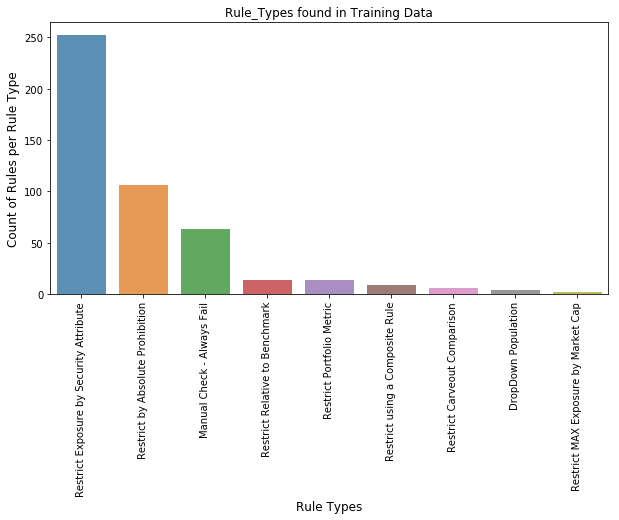

In [9]:
plot_value_counts(rulet_counts, 'Rule_Types found in Training Data','Count of Rules per Rule Type', 'Rule Types' )

## We see that there is a huge imbalance in what rules are classified what. It looks to be most rules are classified as Restrict Exposure by Security Attribute. Im not sure if the category in 3rd: "Manual Check-Always Fail" will be a helpful category here. It does account for 63 of the 470 rules (~13.4% of the rules)


## Trying the same with Limit Types as well


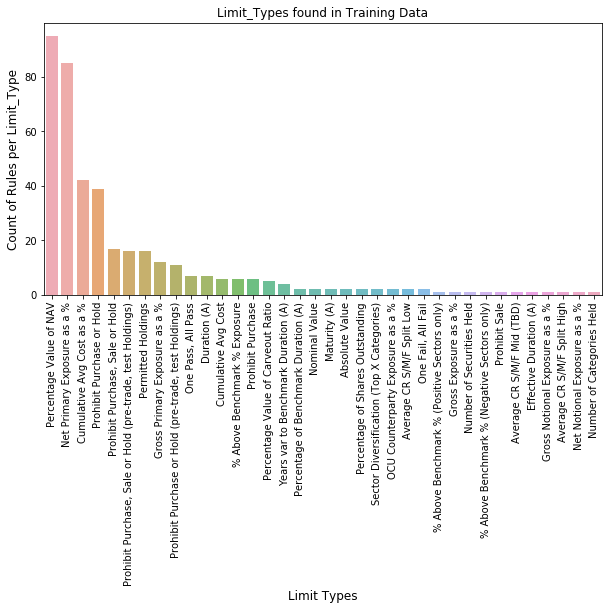

In [11]:
plot_value_counts(limitt_counts, 'Limit_Types found in Training Data', 'Count of Rules per Limit_Type', 'Limit Types')

## We see that there is some problems off the bat similar to Rule_Types. We see that there is a huge imbalance in the limit types of these rules. Also there is a rule type that is labelled  None (NAN) that accounts for 67 of the 470 rules (~14.3% of the rules)

## Building a classifier would be difficult as we do not have many class examples per class that would allow us to consistently give reasonable classifications. I am taking a look at the comment field now to experiment on what I could do there.

In [12]:
desc_comments = rules[['Description', 'Comments']]
desc_comments

,Description,Comments
0,Min 80% of NAV in HY securities inc. in North ...,PRINCIPAL INVESTMENT STRATEGIESUnder normal co...
1,Min 40% of NAV in securities of foreign compan...,The Fund may also invest to a lesser extent in...
2,Permitted Investments,"The Fund will invest in debt securities, deriv..."
3,Min 80% of NAV in Emerging Markets,MANDATE:\nThe Fund will invest in debt securit...
4,Max 15% of NAV In Illiquid Securities,The Fund may invest up to 15% of its ne...
5,Investment Objective,Barings U.S. High Yield Fund (“U.S. High Yie...
6,Permitted Investments,The Fund invests primarily in lower rated U.S...
7,Max 4-10 years Weighted Average Maturity (WAM),The Fund may enter into repurchase agreement t...
8,Min 80% of NAV in US Issuers,PRINCIPAL INVESTMENT STRATEGIESThe Fund invest...
9,Max 15% of NAV In Illiquid Securities,The Fund may invest up to 15% of its ne...


## I see that both of these fields
## Description = Title of the Rule in Thinkfolio
## Comments = Supporting Text (IMA Document Text here)
## Hmm, I could leverage NLP techniques such as TF, TF-IDF, Word2Vec, etc... This could be used to find similarity in new input rules given to the rules used here. I will create that in a separate notebook.